# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | sayat
Processing Record 4 of Set 1 | usogorsk
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | remire-montjoly
Processing Record 7 of Set 1 | coahuayana de hidalgo
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | arroyo
Processing Record 10 of Set 1 | kununurra
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | lamarque
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | darreh shahr
City not found. Skipping...
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,3.52,72,27,5.41,GS,1706828198
1,hermanus,-34.4187,19.2345,23.22,91,10,4.14,ZA,1706828144
2,sayat,38.7839,63.8803,-1.07,58,3,3.83,TM,1706828198
3,usogorsk,63.4106,48.6872,-4.63,95,100,5.56,RU,1706828198
4,udachny,66.4167,112.4000,-30.39,97,98,1.71,RU,1706828198


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.52,72,27,5.41,GS,1706828198
1,hermanus,-34.4187,19.2345,23.22,91,10,4.14,ZA,1706828144
2,sayat,38.7839,63.8803,-1.07,58,3,3.83,TM,1706828198
3,usogorsk,63.4106,48.6872,-4.63,95,100,5.56,RU,1706828198
4,udachny,66.4167,112.4000,-30.39,97,98,1.71,RU,1706828198


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

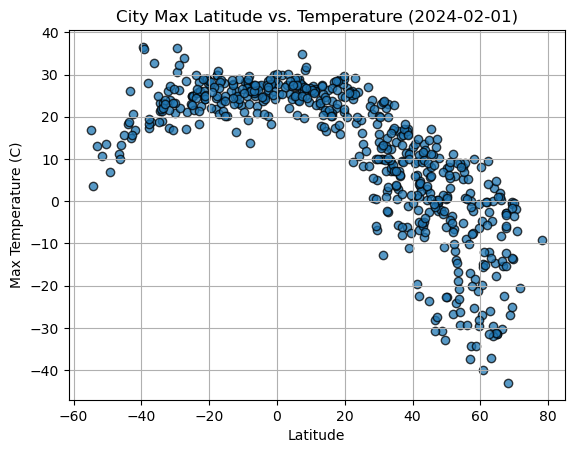

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
date_in_title = pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs. Temperature ({date_in_title})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

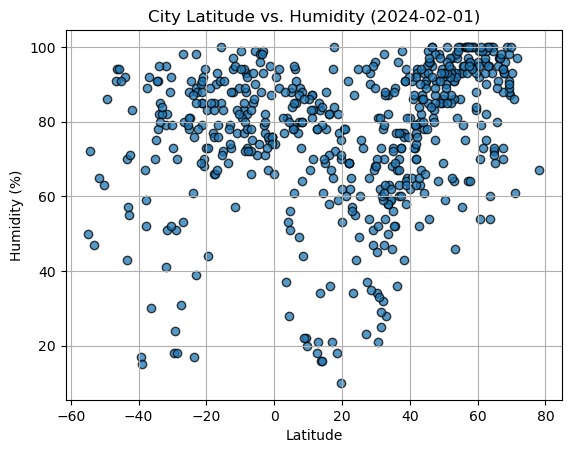

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
date_in_title = pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')
plt.title(f"City Latitude vs. Humidity ({date_in_title})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

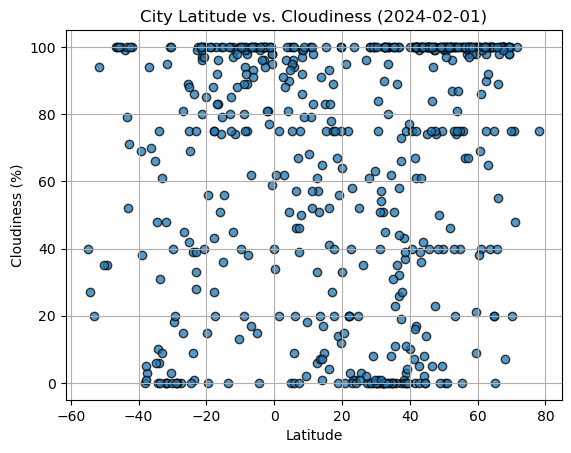

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
date_in_title = pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')
plt.title(f"City Latitude vs. Cloudiness ({date_in_title})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

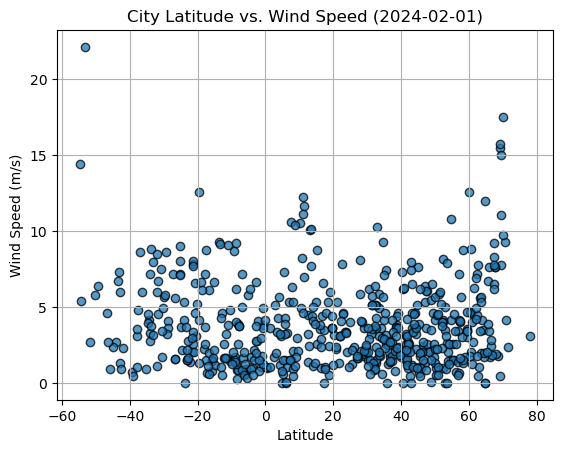

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
date_in_title = pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')
plt.title(f"City Latitude vs. Wind Speed ({date_in_title})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, x_label, y_label, coordinates):
    """
    Create a linear regression plot and annotate with the linear regression equation.

    Parameters:
    - x_values: The x-axis data
    - y_values: The y-axis data
    - title: The title of the plot
    - x_label: The label for the x-axis
    - y_label: The label for the y-axis
    - coordinates: A tuple specifying the position for annotation (text coordinates on the plot)

    Returns:
    None
    """
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sayat,38.7839,63.8803,-1.07,58,3,3.83,TM,1706828198
3,usogorsk,63.4106,48.6872,-4.63,95,100,5.56,RU,1706828198
4,udachny,66.4167,112.4000,-30.39,97,98,1.71,RU,1706828198
5,remire-montjoly,4.9167,-52.2667,25.02,88,0,0.00,GF,1706828198
6,coahuayana de hidalgo,18.7000,-103.6583,28.98,59,14,2.44,MX,1706828198


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,3.52,72,27,5.41,GS,1706828198
1,hermanus,-34.4187,19.2345,23.22,91,10,4.14,ZA,1706828144
9,kununurra,-15.7667,128.7333,27.99,100,100,1.54,AU,1706828198
10,adamstown,-25.0660,-130.1015,24.83,88,42,9.03,PN,1706828199
13,saint-philippe,-21.3585,55.7679,24.77,85,97,7.85,RE,1706828199


###  Temperature vs. Latitude Linear Regression Plot

The r-value for the Northern Hemisphere is: -0.7991310325343361


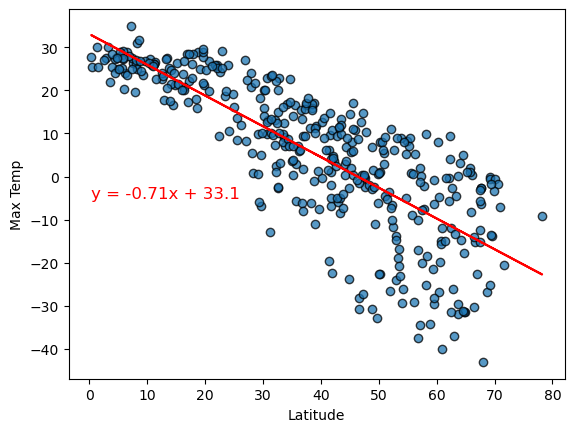

In [15]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope_northern, intercept_northern, rvalue_northern, pvalue_northern, stderr_northern) = linregress(x_values_northern, y_values_northern)

# Print the r-value to the console
print(f"The r-value for the Northern Hemisphere is: {rvalue_northern}")

# Calculate regression values using Northern Hemisphere coefficients
regress_values_northern = x_values_northern * slope_northern + intercept_northern

# Create scatter plot
plt.scatter(x_values_northern, y_values_northern, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line
plt.plot(x_values_northern, regress_values_northern, "r-", label="Linear Regression")

# Annotate linear regression equation
line_eq_northern = f"y = {round(slope_northern, 2)}x + {round(intercept_northern, 2)}"
plt.annotate(line_eq_northern, (min(x_values_northern), max(y_values_northern) - 40), fontsize=12, color="red")

# Graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Show plot
plt.show()


The r-value for the Southern Hemisphere is: 0.484170138563031


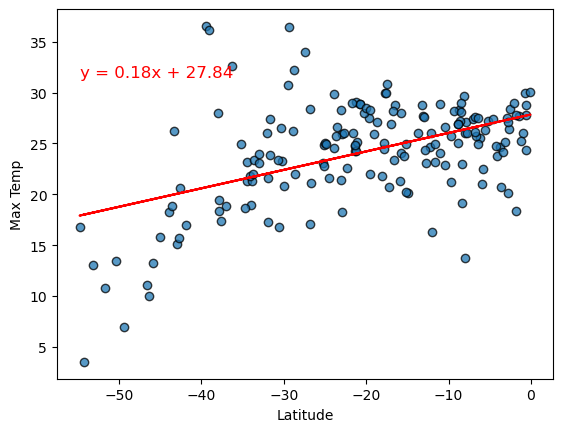

In [16]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope_southern, intercept_southern, rvalue_southern, pvalue_southern, stderr_southern) = linregress(x_values_southern, y_values_southern)

# Print the r-value to the console for the Southern Hemisphere
print(f"The r-value for the Southern Hemisphere is: {rvalue_southern}")

# Calculate regression values using Southern Hemisphere coefficients
regress_values_southern = x_values_southern * slope_southern + intercept_southern

# Create scatter plot
plt.scatter(x_values_southern, y_values_southern, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line
plt.plot(x_values_southern, regress_values_southern, "r-", label="Linear Regression")

# Annotate linear regression equation for the Southern Hemisphere
line_eq_southern = f"y = {round(slope_southern, 2)}x + {round(intercept_southern, 2)}"
plt.annotate(line_eq_southern, (min(x_values_southern), max(y_values_southern) - 5), fontsize=12, color="red")

# Graph properties for the Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


# Show plot for the Southern Hemisphere
plt.show()


**Discussion about the linear relationship:** 

- Both hemispheres exhibit a negative linear relationship between latitude and maximum temperature.
- The r-value for the Southern Hemisphere indicates a stronger negative correlation compared to the Northern Hemisphere.
    - The more negative r-value suggests a more pronounced linear relationship between latitude and maximum temperature.
- Positive correlation: As latitude increases (moves towards the South Pole), maximum temperature tends to increase.- 
Latitude is a good predictor of maximum temperature

### Humidity vs. Latitude Linear Regression Plot

The r-value for the Northern Hemisphere is: 0.41700252985644887


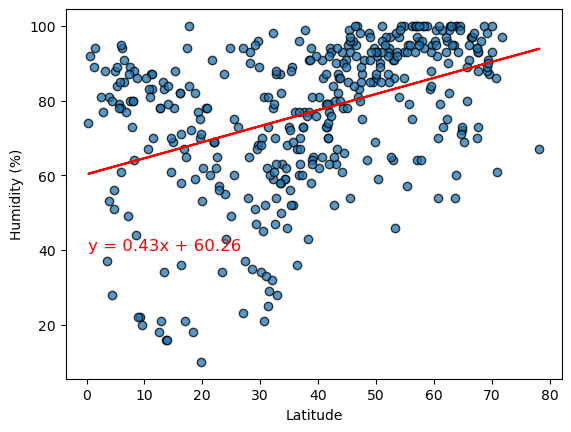

In [17]:
# Select data for Humidity vs. Latitude in the Northern Hemisphere
x_values_northern_humidity = northern_hemi_df["Lat"]
y_values_northern_humidity = northern_hemi_df["Humidity"]

# Perform linear regression for Humidity vs. Latitude in the Northern Hemisphere
(slope_northern_humidity, intercept_northern_humidity, rvalue_northern_humidity, pvalue_northern_humidity, stderr_northern_humidity) = linregress(x_values_northern_humidity, y_values_northern_humidity)

# Print the r-value to the console for the Northern Hemisphere
print(f"The r-value for the Northern Hemisphere is: {rvalue_northern_humidity}")

# Calculate regression values using Northern Hemisphere coefficients
regress_values_northern_humidity = x_values_northern_humidity * slope_northern_humidity + intercept_northern_humidity

# Create scatter plot
plt.scatter(x_values_northern_humidity, y_values_northern_humidity, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line
plt.plot(x_values_northern_humidity, regress_values_northern_humidity, "r-", label="Linear Regression")

# Annotate linear regression equation for the Northern Hemisphere
line_eq_northern_humidity = f"y = {round(slope_northern_humidity, 2)}x + {round(intercept_northern_humidity, 2)}"
plt.annotate(line_eq_northern_humidity, (min(x_values_northern_humidity), max(y_values_northern_humidity) - 60), fontsize=12, color="red")

# Graph properties for Humidity vs. Latitude in the Northern Hemisphere

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Show plot for Humidity vs. Latitude in the Northern Hemisphere
plt.show()

The r-value for the Southern Hemisphere is: 0.3004951422948044


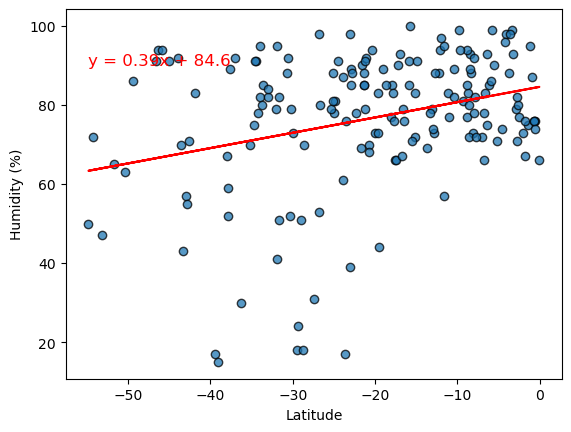

In [18]:
# Southern Hemisphere
#southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Select data for Humidity vs. Latitude in the Southern Hemisphere
x_values_southern_humidity = southern_hemi_df["Lat"]
y_values_southern_humidity = southern_hemi_df["Humidity"]

# Perform linear regression for Humidity vs. Latitude in the Southern Hemisphere
(slope_southern_humidity, intercept_southern_humidity, rvalue_southern_humidity, pvalue_southern_humidity, stderr_southern_humidity) = linregress(x_values_southern_humidity, y_values_southern_humidity)

# Print the r-value to the console for the Southern Hemisphere
print(f"The r-value for the Southern Hemisphere is: {rvalue_southern_humidity}")

# Calculate regression values using Southern Hemisphere coefficients
regress_values_southern_humidity = x_values_southern_humidity * slope_southern_humidity + intercept_southern_humidity

# Create scatter plot
plt.scatter(x_values_southern_humidity, y_values_southern_humidity, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line
plt.plot(x_values_southern_humidity, regress_values_southern_humidity, "r-", label="Linear Regression")

# Annotate linear regression equation for the Southern Hemisphere
line_eq_southern_humidity = f"y = {round(slope_southern_humidity, 2)}x + {round(intercept_southern_humidity, 2)}"
plt.annotate(line_eq_southern_humidity, (min(x_values_southern_humidity), max(y_values_southern_humidity) - 10), fontsize=12, color="red")

# Graph properties for Humidity vs. Latitude in the Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Show plot for Humidity vs. Latitude in the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:**
- Latitude appears to be a more reliable predictor of maximum temperature than humidity in both hemispheres.
- The strength and direction of the correlation vary between the Northern and Southern Hemispheres, emphasizing the importance of considering hemisphere-specific patterns.
- While linear regression provides insights into general trends, other factors not considered in this analysis could influence weather variables. Further investigations and additional variables, like cloudiness and wind speed, might enhance the predictive power.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value for the Northern Hemisphere is: 0.2791099618101993


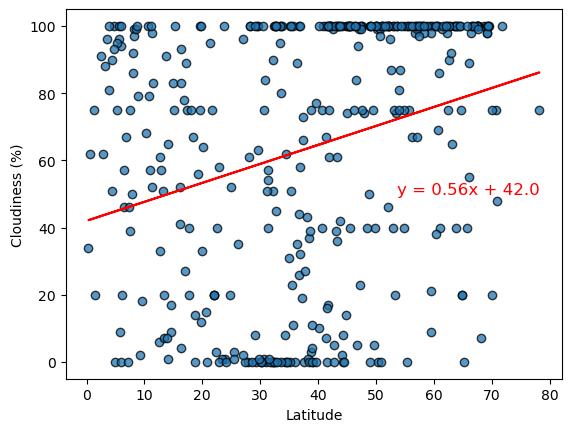

In [19]:
# Northern Hemisphere
x_values_northern_cloudiness = northern_hemi_df["Lat"]
y_values_northern_cloudiness = northern_hemi_df["Cloudiness"]

# Perform linear regression for Cloudiness vs. Latitude in the Northern Hemisphere
(slope_northern_cloudiness, intercept_northern_cloudiness, rvalue_northern_cloudiness, pvalue_northern_cloudiness, stderr_northern_cloudiness) = linregress(x_values_northern_cloudiness, y_values_northern_cloudiness)

# Print the r-value to the console for the Northern Hemisphere
print(f"The r-value for the Northern Hemisphere is: {rvalue_northern_cloudiness}")

# Calculate regression values using Northern Hemisphere coefficients
regress_values_northern_cloudiness = x_values_northern_cloudiness * slope_northern_cloudiness + intercept_northern_cloudiness

# Create scatter plot
plt.scatter(x_values_northern_cloudiness, y_values_northern_cloudiness, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line
plt.plot(x_values_northern_cloudiness, regress_values_northern_cloudiness, "r-", label="Linear Regression")

# Annotate linear regression equation for the Northern Hemisphere
line_eq_northern_cloudiness = f"y = {round(slope_northern_cloudiness, 2)}x + {round(intercept_northern_cloudiness, 2)}"
plt.annotate(line_eq_northern_cloudiness, (max(x_values_northern_cloudiness), max(y_values_northern_cloudiness) - 50), fontsize=12, color="red", ha='right')

# Graph properties for Cloudiness vs. Latitude in the Northern Hemisphere)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show plot for Cloudiness vs. Latitude in the Northern Hemisphere
plt.show()

The r-value in the Southern Hemisphere is: 0.35908190737246864


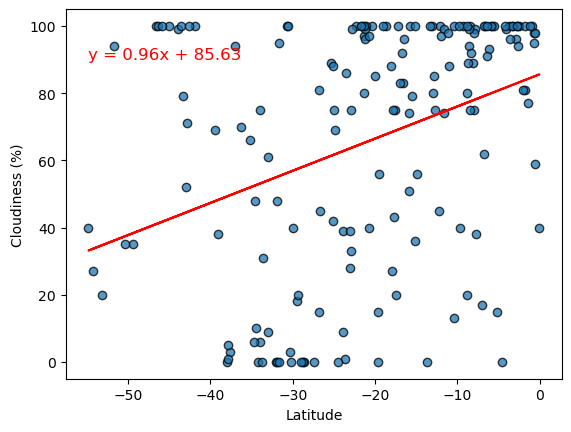

In [20]:
# Southern Hemisphere
x_values_southern_cloudiness = southern_hemi_df["Lat"]
y_values_southern_cloudiness = southern_hemi_df["Cloudiness"]

# Perform linear regression for Cloudiness vs. Latitude in the Southern Hemisphere
(slope_southern_cloudiness, intercept_southern_cloudiness, rvalue_southern_cloudiness, pvalue_southern_cloudiness, stderr_southern_cloudiness) = linregress(x_values_southern_cloudiness, y_values_southern_cloudiness)

# Print the r-value to the console for the Southern Hemisphere
print(f"The r-value in the Southern Hemisphere is: {rvalue_southern_cloudiness}")

# Calculate regression values using Southern Hemisphere coefficients
regress_values_southern_cloudiness = x_values_southern_cloudiness * slope_southern_cloudiness + intercept_southern_cloudiness

# Create scatter plot
plt.scatter(x_values_southern_cloudiness, y_values_southern_cloudiness, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line
plt.plot(x_values_southern_cloudiness, regress_values_southern_cloudiness, "r-", label="Linear Regression")

# Annotate linear regression equation for the Southern Hemisphere
line_eq_southern_cloudiness = f"y = {round(slope_southern_cloudiness, 2)}x + {round(intercept_southern_cloudiness, 2)}"
plt.annotate(line_eq_southern_cloudiness, (min(x_values_southern_cloudiness), max(y_values_southern_cloudiness) - 10), fontsize=12, color="red")

# Graph properties for Cloudiness vs. Latitude in the Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Show plot for Cloudiness vs. Latitude in the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:**
- Both hemispheres show weak positive correlations and slight increase in cloudiness with increasing latitude.
- Latitude might not be a strong predictor of cloudiness in either hemisphere, as indicated by low r-values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value for the Northern Hemisphere is: 0.12669116009298326


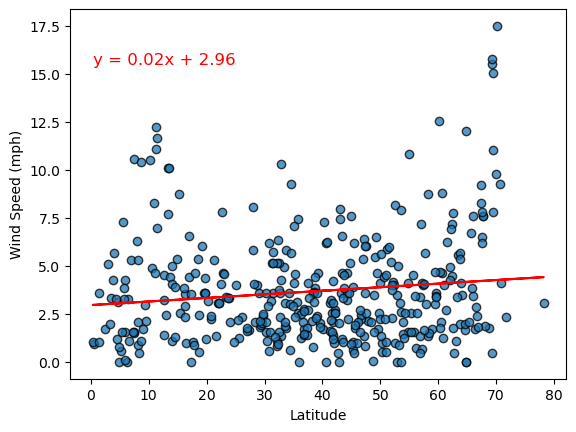

In [21]:
# Northern Hemisphere
x_values_northern_wind = northern_hemi_df["Lat"]
y_values_northern_wind = northern_hemi_df["Wind Speed"]

# Perform linear regression for Wind Speed vs. Latitude in the Northern Hemisphere
(slope_northern_wind, intercept_northern_wind, rvalue_northern_wind, pvalue_northern_wind, stderr_northern_wind) = linregress(x_values_northern_wind, y_values_northern_wind)

# Print the r-value to the console for the Northern Hemisphere
print(f"The r-value for the Northern Hemisphere is: {rvalue_northern_wind}")

# Calculate regression values using Northern Hemisphere coefficients
regress_values_northern_wind = x_values_northern_wind * slope_northern_wind + intercept_northern_wind

# Create scatter plot
plt.scatter(x_values_northern_wind, y_values_northern_wind, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line
plt.plot(x_values_northern_wind, regress_values_northern_wind, "r-", label="Linear Regression")

# Annotate linear regression equation for the Northern Hemisphere
line_eq_northern_wind = f"y = {round(slope_northern_wind, 2)}x + {round(intercept_northern_wind, 2)}"
plt.annotate(line_eq_northern_wind, (min(x_values_northern_wind), max(y_values_northern_wind) - 2), fontsize=12, color="red", ha='left')

# Graph properties for Wind Speed vs. Latitude in the Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Show plot for Wind Speed vs. Latitude in the Northern Hemisphere
plt.show()

The r-value for the Southern Hemisphere is: -0.3051540993703658


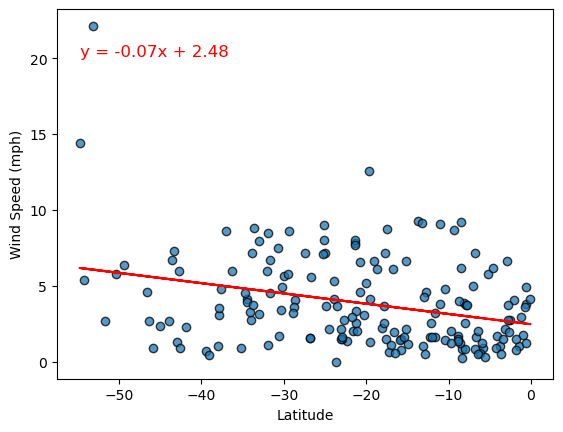

In [22]:
# Southern Hemisphere
x_values_southern_wind = southern_hemi_df["Lat"]
y_values_southern_wind = southern_hemi_df["Wind Speed"]

# Perform linear regression for Wind Speed vs. Latitude in the Southern Hemisphere
(slope_southern_wind, intercept_southern_wind, rvalue_southern_wind, pvalue_southern_wind, stderr_southern_wind) = linregress(x_values_southern_wind, y_values_southern_wind)

# Print the r-value to the console for the Southern Hemisphere
print(f"The r-value for the Southern Hemisphere is: {rvalue_southern_wind}")

# Calculate regression values using Southern Hemisphere coefficients
regress_values_southern_wind = x_values_southern_wind * slope_southern_wind + intercept_southern_wind

# Create scatter plot
plt.scatter(x_values_southern_wind, y_values_southern_wind, edgecolors="black", alpha=0.75, label="Data")

# Plot regression line
plt.plot(x_values_southern_wind, regress_values_southern_wind, "r-", label="Linear Regression")

# Annotate linear regression equation for the Southern Hemisphere
line_eq_southern_wind = f"y = {round(slope_southern_wind, 2)}x + {round(intercept_southern_wind, 2)}"
plt.annotate(line_eq_southern_wind, (min(x_values_southern_wind), max(y_values_southern_wind) - 2), fontsize=12, color="red", ha='left')

# Graph properties for Wind Speed vs. Latitude in the Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Show plot for Wind Speed vs. Latitude in the Southern Hemisphere
plt.show()

**Discussion about the linear relationship:** 
- Both hemispheres show weak negative correlation and slight decrease in wind speed with increasing latitude.
- Latitude might not be a strong predictor of wind speed.